In [39]:
import os
import sys
import json
import pandas as pd
import numpy as np
import torch
from typing import Literal, TypedDict

In [40]:
sys.path.append("..")
os.environ["USER_PATH"] = "../userdata/"

In [41]:
from system.namespace.store import get_namespace

In [42]:
namespace = get_namespace("train_new")

In [43]:
prefix = "final_train2_"

In [44]:
from system.links.store import get_link_store
from system.msgs.store import get_message_store
from misc.util import now_ts

In [45]:
msgs = get_message_store(namespace)

In [46]:
topics = msgs.get_topics(0, None)
[t.get_text() for t in topics][::-1]

['t/blep',
 't/5t44t4yf5frt3',
 't/mildlysatisfying',
 't/itsjasonbourne',
 't/explainthejoke',
 't/subsifellforbutneeded',
 't/scripedlatinasgifs',
 't/foreveralone',
 't/crappyheadlinedesign',
 't/sociopathsincars',
 't/battlestations',
 't/gooncaves',
 't/foundthetoyotacorolla',
 't/instantchaos',
 't/videosthatstarttoolate',
 't/indoorbouldering',
 't/valorant',
 't/bringbackthorn',
 't/fixedbytheduet',
 't/nolawns',
 't/nissandrivers',
 't/gingermafia',
 't/coventry',
 't/animalcrossing',
 't/unexpectedscp',
 't/trolleyproblem',
 't/formula1',
 't/hololive',
 't/unexpectedboburnham',
 't/suddenlyincest',
 't/foundthewelshman',
 't/ithadtobebrazil',
 't/fogofworld',
 't/persecutionfetish',
 't/fuckyouchichan',
 't/meormyson',
 't/samespecies',
 't/murderedbyaoc',
 't/iso8601',
 't/unexpectedauntydonna',
 't/surrendercobra',
 't/shitfromabutt',
 't/mildlypenis',
 't/getmotivated',
 't/suddenblackbooks',
 't/airplaneears',
 't/usdefaultism',
 't/keep_track',
 't/cuteguyswithcats',
 '

In [47]:
links = get_link_store(namespace)

In [48]:
total_count = 25000

In [49]:
%%time

roots = [t.get_hash() for t in topics][::-1]
all_ms = []
now = now_ts()
while len(all_ms) < total_count and roots:
    cur_root = roots.pop()
    if len(all_ms) < total_count:
        all_ms.append(cur_root)
    else:
        break
    for link in links.get_all_children(cur_root, now):
        child = link.get_child()
        if child not in all_ms and child not in roots:
            if len(all_ms) < total_count:
                all_ms.append(cur_root)
                roots.append(child)
            else:
                break
# display(roots)
roots = None
len(all_ms)

CPU times: user 55.4 s, sys: 229 ms, total: 55.6 s
Wall time: 56 s


25000

In [50]:
from system.embedding.store import get_embed_store
from misc.lru import LRU

In [51]:
embeds = get_embed_store(namespace)

In [52]:
role_c = "child"
role_p = "parent"

In [53]:
total_c = embeds.get_embedding_count(role_c)
total_c

601703

In [54]:
total_p = embeds.get_embedding_count(role_p)
total_p

601703

In [55]:
from sklearn.manifold import TSNE

In [56]:
%%time

x_0 = np.vstack([
    embeds.get_embedding(
        msgs,
        role_c,
        mhash,
        no_index=True,
        no_cache=False).ravel().detach().numpy()
    # embed[1].ravel().detach().numpy()
    # for embed in embeds.get_all_embeddings(role_c, progress_bar=True)
    for mhash in all_ms
])
y_0 = x_0.shape[0]
x_1 = np.vstack([
    embeds.get_embedding(
        msgs,
        role_p,
        mhash,
        no_index=True,
        no_cache=False).ravel().detach().numpy()
    # embed[1].ravel().detach().numpy()
    # for embed in embeds.get_all_embeddings(role_p, progress_bar=True)
    for mhash in all_ms
])
y_1 = x_1.shape[0]
y = [
    "tab:blue" for _ in range(y_0)
] + [
    "tab:orange" for _ in range(y_1)
]
x = np.vstack([x_0, x_1])
assert y_0 == y_1
aa_count = y_0
total_c = y_0
total_p = y_1
x.shape, y_0, y_1

CPU times: user 1min 22s, sys: 7.28 s, total: 1min 29s
Wall time: 2min 11s


((50000, 768), 25000, 25000)

In [57]:
x[:5, :]

array([[-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.01165187, -0.00791478, -0.10432247, ..., -0.27786684,
        -0.09048332,  0.02258721]])

In [58]:
aa = x[list(range(aa_count)) + list(range(total_c, total_c + aa_count)), :]
aa_y = [
    "tab:blue" for _ in range(aa_count)
] + [
    "tab:orange" for _ in range(aa_count)
]
aa.shape

(50000, 768)

In [59]:
aa[:5, :]

array([[-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.08229904,  0.00255826,  0.20488095, ...,  0.40840563,
         0.000478  ,  0.04143146],
       [-0.01165187, -0.00791478, -0.10432247, ..., -0.27786684,
        -0.09048332,  0.02258721]])

In [60]:
aa[aa_count - 1:aa_count + 4,:]

array([[-0.08119173,  0.00925212,  0.2151171 , ...,  0.4054077 ,
         0.01421022,  0.03980233],
       [-0.06835252,  0.04942821,  0.00570786, ...,  0.40949529,
         0.07192298, -0.00519979],
       [-0.06835252,  0.04942821,  0.00570786, ...,  0.40949529,
         0.07192298, -0.00519979],
       [-0.06835252,  0.04942821,  0.00570786, ...,  0.40949529,
         0.07192298, -0.00519979],
       [-0.06835252,  0.04942821,  0.00570786, ...,  0.40949529,
         0.07192298, -0.00519979]])

In [61]:
x = None
y = None

In [62]:
def angle_color(xs, ys):
    dx = xs[1] - xs[0]
    sq_length = (xs[1] - xs[0])**2 + (ys[1] - ys[0])**2
    if np.isclose(sq_length, 0.0):
        res = 0.0
    else:
        dxnorm = dx / np.sqrt(sq_length)
        res = np.rad2deg(np.arccos(dxnorm))
        if ys[1] > ys[0]:
            res = 360.0 - res
        res /= 360.0
    return hsv_to_rgb([res, 0.8, 0.8])

In [63]:
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

def distance(a, b):
    # return np.log1p(
    return np.exp(-np.dot(a, b))
    # return 1.0 - sigmoid(np.dot(a, b))

In [64]:
force_recompute = False
outfile = f"{prefix}tsne2.pq"

In [65]:
%%time

if force_recompute or not os.path.exists(outfile):
    aa_embedded = TSNE(
        n_components=2,
        learning_rate="auto",
        init="pca",
        perplexity=50,
        method="barnes_hut",
        random_state=42,
        metric=distance,
        n_jobs=-1).fit_transform(aa)
    df = pd.DataFrame({"x": aa_embedded[:, 0], "y": aa_embedded[:, 1], "l": aa_y})
    df.to_parquet(outfile)
    display(aa_embedded.shape)
    display(df.head())
else:
    df = pd.read_parquet(outfile)
    display(df.head())

,x,y,l
0,31.122990,15.980133,tab:blue
1,31.110588,15.957175,tab:blue
2,31.136742,15.890937,tab:blue
3,31.136742,15.890937,tab:blue
4,58.598949,-28.676912,tab:blue


CPU times: user 22 ms, sys: 18 ms, total: 40.1 ms
Wall time: 175 ms


In [66]:
df.iloc[aa_count - 1:, :].head()

,x,y,l
24999,47.873390,8.447930,tab:blue
25000,12.842544,-22.799297,tab:orange
25001,12.842544,-22.799297,tab:orange
25002,12.842544,-22.799297,tab:orange
25003,12.842544,-22.799297,tab:orange


In [67]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import hsv_to_rgb

In [68]:
# tmp_count = 100
# tmp = df.copy().iloc[list(range(tmp_count)) + list(range(total_c, total_c + tmp_count)), :]
# tmp.shape
tmp_count = aa_count
tmp = df.copy()
tmp.shape

(50000, 3)

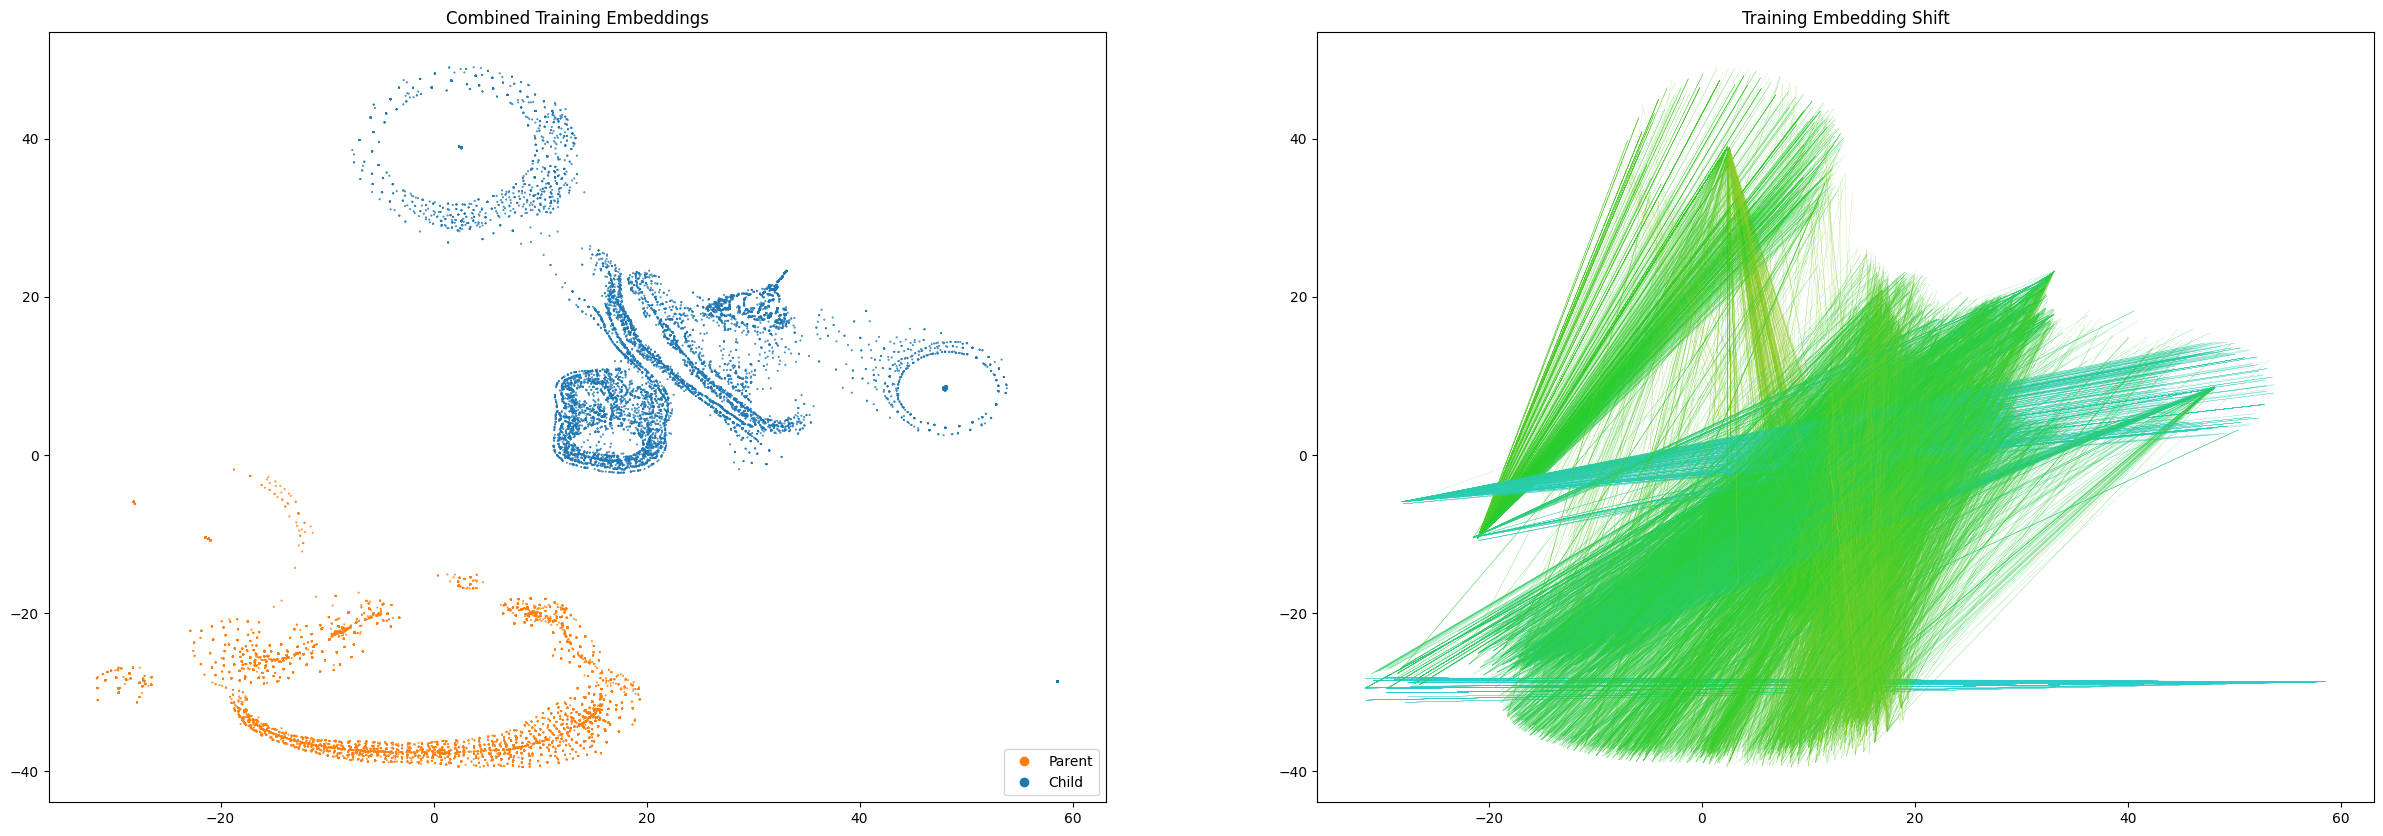

In [76]:
fig, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
# fig.suptitle("Training", fontsize=16)
tmp.plot.scatter(
    x="x",
    y="y",
    s=0.2,
    c="l",
    # alpha=0.5,
    xlabel="",
    ylabel="",
    ax=ax_left,
    title="Combined Training Embeddings")
legend_elements = [
    Line2D([0], [0], color="tab:orange", marker="o", lw=0, label="Parent"),
    Line2D([0], [0], color="tab:blue", marker="o", lw=0, label="Child"),
]
ax_left.legend(handles=legend_elements, loc="lower right")
tmp.plot.scatter(
    x="x",
    y="y",
    s=0.2,
    c="l",
    alpha=0.0,
    xlabel="",
    ylabel="",
    ax=ax_right,
    title="Training Embedding Shift")
for ix in range(tmp_count):
    xs = (tmp["x"].iloc[ix], tmp["x"].iloc[ix + tmp_count])
    ys = (tmp["y"].iloc[ix], tmp["y"].iloc[ix + tmp_count])
    ax_right.add_line(Line2D(
        xs,
        ys,
        # alpha=0.5,
        lw=0.1,
        c=angle_color(xs, ys)))
plt.savefig(f"{prefix}full_log1pexpneg.png", bbox_inches="tight")
plt.show()

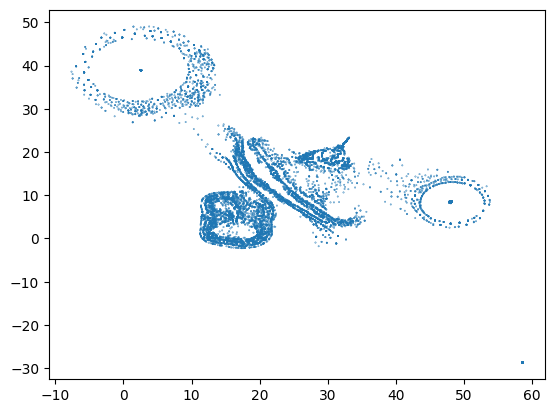

In [ ]:
tmp.iloc[:tmp_count, :].plot.scatter(
    x="x",
    y="y",
    s=0.1,
    c="l",
    # alpha=0.5,
    xlabel="",
    ylabel="")
plt.savefig(f"{prefix}child_log1pexpneg.png", bbox_inches="tight")
plt.show()

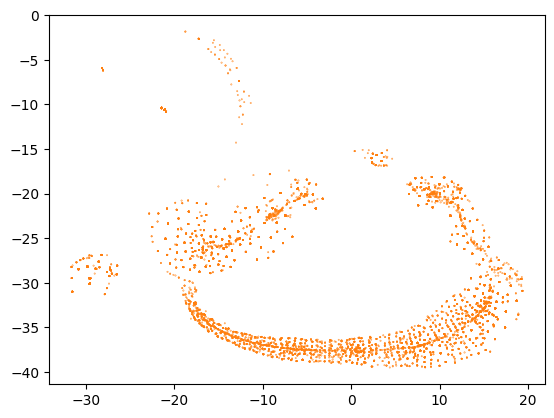

In [ ]:
tmp.iloc[tmp_count:, :].plot.scatter(
    x="x",
    y="y",
    s=0.1,
    c="l",
    # alpha=0.5,
    xlabel="",
    ylabel="")
plt.savefig(f"{prefix}parent_log1pexpneg.png", bbox_inches="tight")
plt.show()

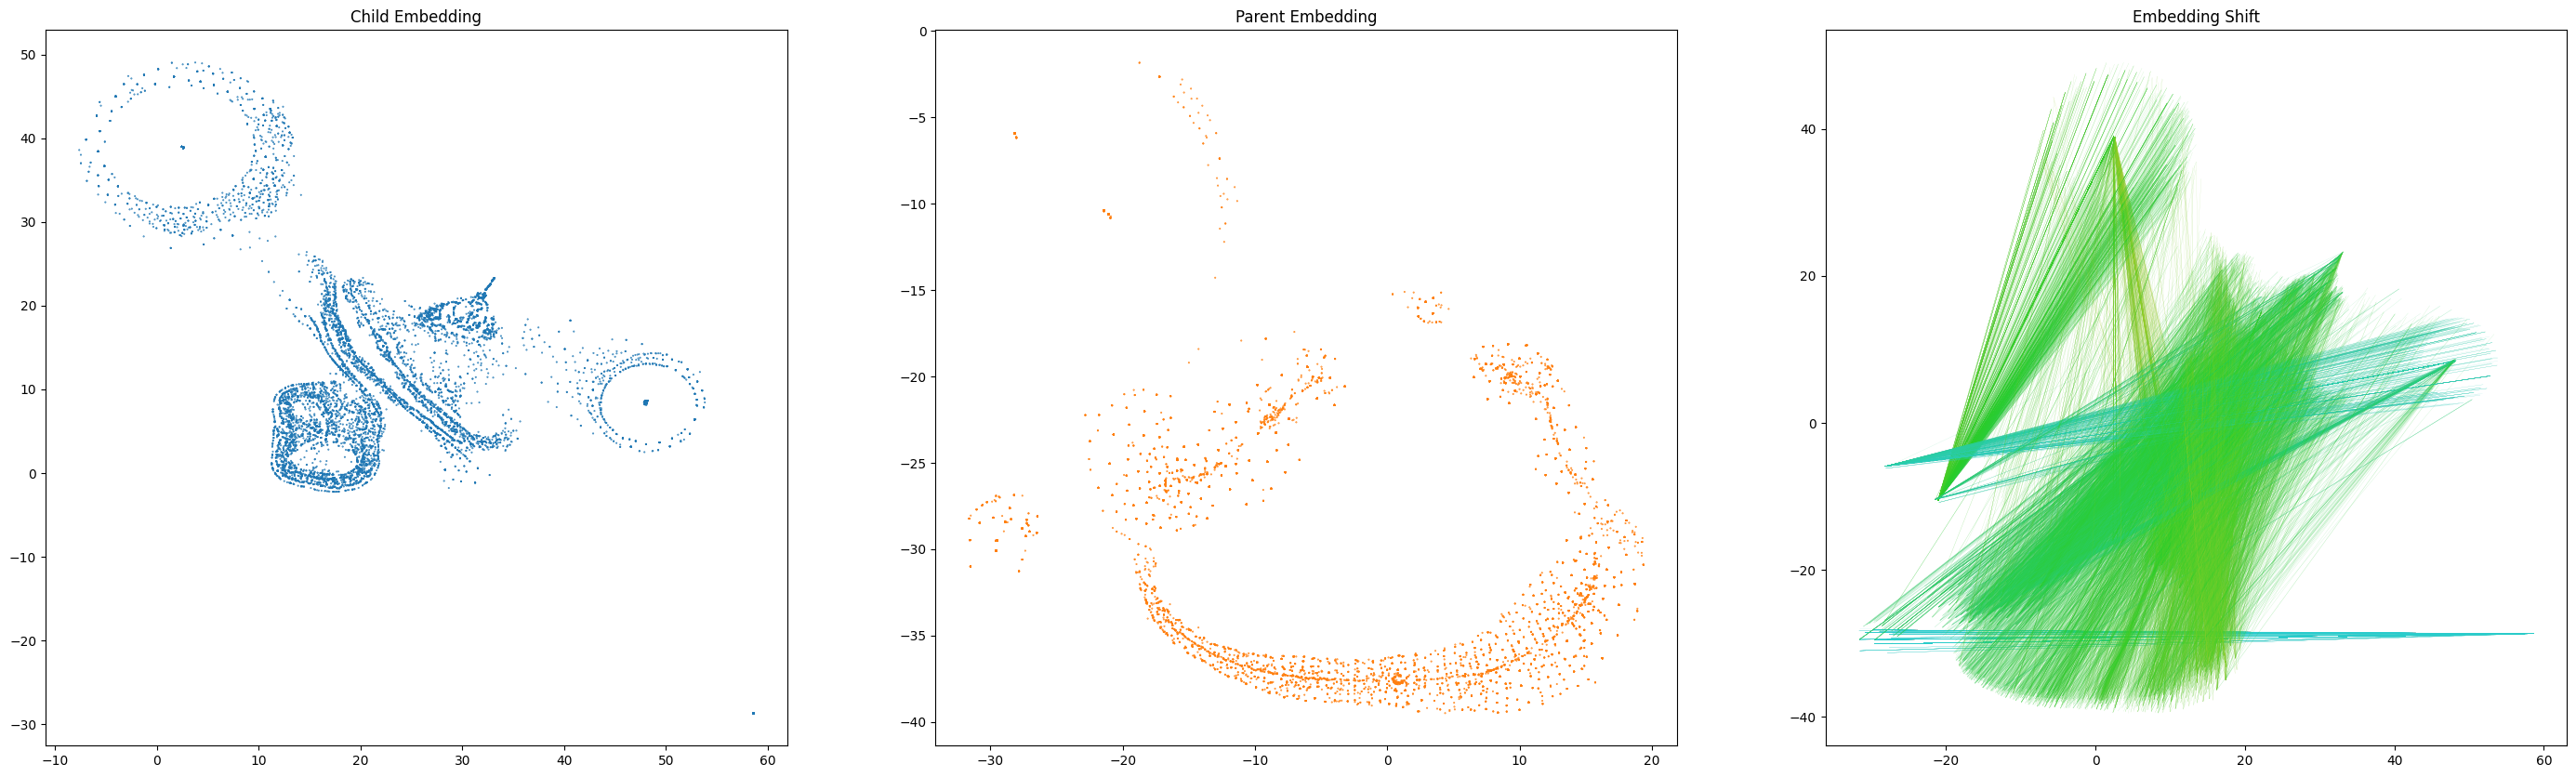

In [ ]:
fig, (ax_left, ax_mid, ax_right) = plt.subplots(nrows=1, ncols=3, figsize=(35, 10))
tmp[tmp["l"] == "tab:blue"].plot.scatter(
    x="x",
    y="y",
    s=0.2,
    c="l",
    # alpha=0.5,
    xlabel="",
    ylabel="",
    ax=ax_left,
    title="Child Embedding")
tmp[tmp["l"] == "tab:orange"].plot.scatter(
    x="x",
    y="y",
    s=0.2,
    c="l",
    # alpha=0.5,
    xlabel="",
    ylabel="",
    ax=ax_mid,
    title="Parent Embedding")
tmp.plot.scatter(
    x="x",
    y="y",
    s=0.2,
    c="l",
    alpha=0.0,
    xlabel="",
    ylabel="",
    ax=ax_right,
    title="Embedding Shift")
for ix in range(tmp_count):
    xs = (tmp["x"].iloc[ix], tmp["x"].iloc[ix + tmp_count])
    ys = (tmp["y"].iloc[ix], tmp["y"].iloc[ix + tmp_count])
    ax_right.add_line(Line2D(
        xs,
        ys,
        alpha=0.5,
        lw=0.1,
        c=angle_color(xs, ys)))
plt.savefig(f"{prefix}tri_log1pexpneg.png", bbox_inches="tight")
plt.show()

In [ ]:
# k * n log(n) = t
total_time = ((11 * 60.0) + 50 * 60) + 3
k = total_time / (total_c * np.log(total_c))
new_size = 50000
k * new_size * np.log(new_size)

7827.4497114298365

In [ ]:
# tt_count = 15000
# tt = x[list(range(tt_count)) + list(range(total_c, total_c + tt_count)), :]
# tt_y = [
#     "tab:blue" for _ in range(tt_count)
# ] + [
#     "tab:orange" for _ in range(tt_count)
# ]
# tt.shape

In [ ]:
# %%time

# tt_embedded = TSNE(
#     n_components=2,
#     learning_rate="auto",
#     init="random",
#     perplexity=10,
#     method="barnes_hut",
#     random_state=42,
#     # metric="cosine",
#     n_jobs=-1).fit_transform(tt)

In [ ]:
# t_df = pd.DataFrame({"x": tt_embedded[:, 0], "y": tt_embedded[:, 1], "l": tt_y})
# t_df.head()

In [ ]:
# fig, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
# t_df.plot.scatter(
#     x="x",
#     y="y",
#     s=0.2,
#     c="l",
#     # alpha=0.1,
#     xlabel="",
#     ylabel="",
#     ax=ax_left)
# t_df.plot.scatter(
#     x="x",
#     y="y",
#     s=0.2,
#     c="l",
#     alpha=0,
#     xlabel="",
#     ylabel="",
#     ax=ax_right)
# for ix in range(tt_count):
#     xs = (t_df["x"].iloc[ix], t_df["x"].iloc[ix + tt_count])
#     ys = (t_df["y"].iloc[ix], t_df["y"].iloc[ix + tt_count])
#     ax_right.add_line(Line2D(
#         xs,
#         ys,
#         # alpha=0.05,
#         lw=0.1,
#         c=angle_color(xs, ys)))
# plt.savefig("subset_euclid.png", bbox_inches="tight")
# plt.show()

In [60]:
from system.msgs.message import MHash

In [74]:
# Which black and white movies are absolutely worth watching?
ref = MHash.parse("e8b0d3b35250839af96e62c046caabd4999550ad2fb0f24624b1a4c03d925d6c")
now = now_ts()
[
    (
        msgs.read_message(link.get_child()).get_hash().to_parseable(),
        msgs.read_message(link.get_child()).get_text(),
    )
    for link in links.get_all_children(ref, now)
]

[('26002625b936ab610b744a3ad4f623bcd2cc592aadfecfcbdea31596f89aeb4f',
  'The Haunting of Hill House. Atmospheric, spooky, and very well done.'),
 ('9725ea724d0d4cdc47867bd7f3967bfd802e8072cec558a04f715aa5f0ce06ca',
  'Laurel and Hardy the Music Box. It’s only 30 minutes, is friggen hilarious…and you can watch it here on YouTube https://youtube.com/watch?v=xIWcfBWrQlk&feature=share'),
 ('05709bd8dc6bf5cea6b4295d737b922f528daf45105e16ba2a822fabe2d919c9',
  'Dr. Strangelove or How I Learned to Stop Caring and Love the Bomb\n\nEasily my favourite Kubrick film and one of the best black comedies out there.'),
 ('8fcb7b587a752f253605e205a3dd68a1cb398675956119467f4a1687e5366748',
  "Dead Men Don't Wear Plaid  ;)"),
 ('eba6d6554ee979a65d3ddc0b34bde99aba80f7d1e8e89c8cbb2b5cfa432563a3',
  'All quiet on the western front 1930 it still stands up'),
 ('6e2a336dd2d34411f7087b72e1474da248f824626f293c35f5ff853420b4bd43',
  'Brief Encounter.'),
 ('21e49c7295cd5166dc116c2132233b7c2fec46160b782603503f8e06

In [75]:
embeds_pq = pd.read_parquet("/Users/krause/workspace/fann/embeds.pq")
embeds_pq

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_758,col_759,col_760,col_761,col_762,col_763,col_764,col_765,col_766,col_767
0,0.187556,0.054266,-0.355687,-0.720444,0.765896,-0.341221,0.955582,1.498698,-0.229834,0.294793,...,-0.057425,0.064697,0.100166,-0.846495,-0.440370,0.098333,0.365876,-0.418113,-0.357133,0.158937
1,0.127789,0.033254,-0.376124,-0.762468,0.795435,-0.384039,0.977513,1.463145,-0.233444,0.340534,...,-0.033250,0.075337,0.106188,-0.822931,-0.463676,0.089926,0.395332,-0.364686,-0.361282,0.179179
2,0.075294,0.105776,-0.198432,-0.797172,0.716205,-0.296569,0.856986,1.631273,-0.369704,0.237189,...,0.209959,0.044318,0.144006,-0.867527,-0.291238,-0.027707,0.286547,-0.510216,-0.184788,0.323380
3,0.140740,0.114380,-0.379936,-0.794984,0.631552,-0.475874,0.932225,1.479470,-0.273788,0.325422,...,-0.142919,0.126940,0.091418,-0.895657,-0.431000,0.064054,0.517937,-0.425065,-0.480483,0.250477
4,0.116093,-0.067832,-0.294383,-0.898375,0.672781,-0.220382,0.937766,1.504971,-0.293722,0.273324,...,-0.053898,0.007314,0.039204,-0.823628,-0.532449,-0.041575,0.444554,-0.435547,-0.376477,0.185267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689413,0.014033,0.038107,-0.207957,-0.788550,0.742844,-0.409261,0.863699,1.487547,-0.303630,0.288753,...,-0.024898,-0.007693,0.093969,-0.864437,-0.518848,0.056775,0.372738,-0.334518,-0.421781,0.238344
689414,0.094255,0.063311,-0.350151,-0.823031,0.572478,-0.418123,0.911777,1.561555,-0.259192,0.199433,...,0.012870,0.146371,0.243238,-0.903765,-0.361293,0.115385,0.350802,-0.439061,-0.370927,0.242649
689415,0.063416,0.214813,-0.370198,-0.726602,0.678506,-0.409628,0.886787,1.678844,-0.236868,0.268962,...,0.092576,0.111445,0.158176,-0.830545,-0.326182,0.008574,0.269136,-0.250904,-0.269381,0.195369
689416,-0.070942,0.041789,-0.381800,-0.662452,0.461316,-0.306606,0.886342,1.664666,-0.239792,0.118970,...,0.075881,0.028086,0.407115,-0.897198,-0.180318,-0.046692,0.350740,-0.583210,-0.259814,0.129780


In [78]:
small_pq = embeds_pq.iloc[:2000,:]
small_pq.shape

(2000, 768)

In [79]:
small_pq.to_parquet("/Users/krause/workspace/fann/test.pq")